In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
import json
import datetime
import scipy
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
from pylab import plot, title, show , legend

import plotly
from plotly.graph_objs import Scatter, Layout

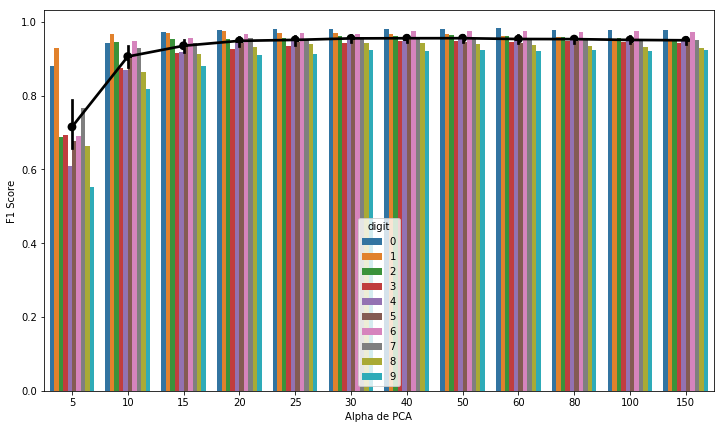

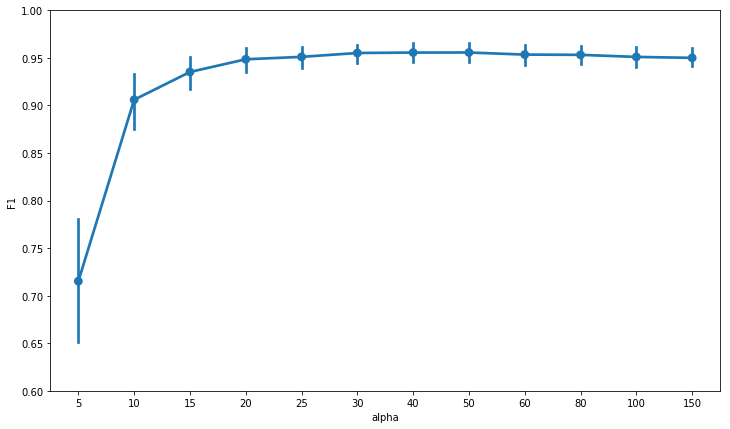

In [86]:
#F1 Score key digitos, index alpha Chamuyemos el k

d0 = pd.DataFrame({
    'F1' : [0.8803, 0.9425, 0.9718, 0.9771, 0.9818, 0.9793, 0.9807, 0.9803, 0.9822, 0.9788, 0.9788, 0.9773],
    'alpha' : [5,10,15,20,25,30,40,50,60,80,100,150],
    'digit' : [0]*12
})
d1 = pd.DataFrame({
    'F1' : [0.9303, 0.9660, 0.9698, 0.9746, 0.9702, 0.9707, 0.9673, 0.9669, 0.9627, 0.9590, 0.9547, 0.9532],
    'alpha' : [5,10,15,20,25,30,40,50,60,80,100,150],
    'digit' : [1]*12
})
d2 = pd.DataFrame({
    'F1' : [0.6882, 0.9448, 0.9531, 0.9544, 0.9573, 0.9621, 0.9611, 0.9635, 0.9604, 0.9593, 0.9566, 0.9530],
    'alpha' : [5,10,15,20,25,30,40,50,60,80,100,150],
    'digit' : [2]*12
})
d3 = pd.DataFrame({
    'F1' : [0.6937, 0.8751, 0.9161, 0.9260, 0.9336, 0.9429, 0.9474, 0.9479, 0.9465, 0.9488, 0.9440, 0.9415],
    'alpha' : [5,10,15,20,25,30,40,50,60,80,100,150],
    'digit' : [3]*12
})
d4 = pd.DataFrame({
    'F1' : [0.6087, 0.8705, 0.9174, 0.9417, 0.9468, 0.9534, 0.9494, 0.9556, 0.9494, 0.9542, 0.9540, 0.9532],
    'alpha' : [5,10,15,20,25,30,40,50,60,80,100,150],
    'digit' : [4]*12
})
d5 = pd.DataFrame({
    'F1' : [0.6773, 0.9012, 0.9321, 0.9437, 0.9453, 0.9495, 0.9527, 0.9462, 0.9414, 0.9467, 0.9436, 0.9441],
    'alpha' : [5,10,15,20,25,30,40,50,60,80,100,150],
    'digit' : [5]*12
})
d6 = pd.DataFrame({
    'F1' : [0.6904, 0.9485, 0.9567, 0.9680, 0.9703, 0.9681, 0.9738, 0.9754, 0.9753, 0.9728, 0.9754, 0.9737],
    'alpha' : [5,10,15,20,25,30,40,50,60,80,100,150],
    'digit' : [6]*12
})
d7 = pd.DataFrame({
    'F1' : [0.7668, 0.9286, 0.9419, 0.9559, 0.9523, 0.9595, 0.9596, 0.9558, 0.9557, 0.9529, 0.9490, 0.9499],
    'alpha' : [5,10,15,20,25,30,40,50,60,80,100,150],
    'digit' : [7]*12
})
d8 = pd.DataFrame({
    'F1' : [0.6648, 0.8630, 0.9119, 0.9331, 0.9392, 0.9428, 0.9430, 0.9408, 0.9384, 0.9347, 0.9325, 0.9293],
    'alpha' : [5,10,15,20,25,30,40,50,60,80,100,150],
    'digit' : [8]*12
})
d9 = pd.DataFrame({
    'F1' : [0.5516, 0.8191, 0.8806, 0.9104, 0.9135, 0.9227, 0.9205, 0.9238, 0.9222, 0.9244, 0.9211, 0.9247],
    'alpha' : [5,10,15,20,25,30,40,50,60,80,100,150],
    'digit' : [9]*12
})

df = pd.concat([d0,d1,d2,d3,d4,d5,d6,d7,d8,d9], ignore_index=True)
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(ax=ax, x="alpha", y="F1", hue="digit", data=df)
sns.pointplot(ax=ax, x="alpha", y="F1", color="black", data=df)
ax.set_xlabel("Alpha de PCA")
ax.set_ylabel("F1 Score")
plt.show()

fig, ax = plt.subplots(figsize=(12,7))
plt.ylim(0.6, 1)
sns.pointplot(ax=ax, x="alpha", y="F1", data=df)
plt.show()

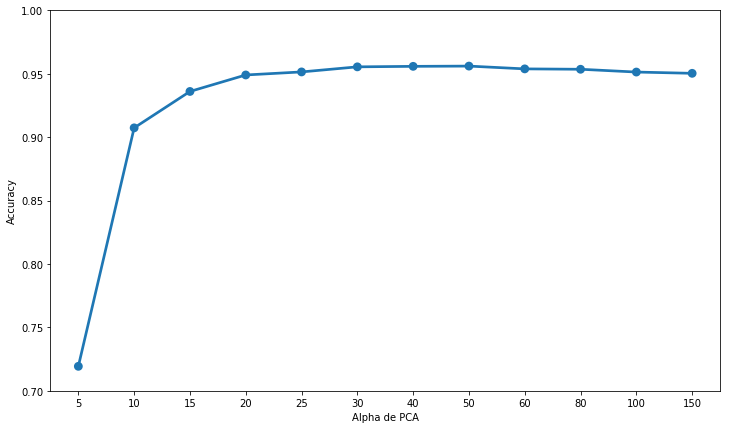

In [116]:
#Accuaracy #habria que ver si sale mejor con barras
alpha = [5,10,15,20,25,30,40,50,60,80,100,150] #alpha
accuracy = [0.7193, 0.9073, 0.9360, 0.9490, 0.9514, 0.9554, 0.9558, 0.9560, 0.9538, 0.9535, 0.9513, 0.9503]

df = pd.DataFrame({"alpha":alpha, "accuracy":accuracy})
fig, ax = plt.subplots(figsize=(12,7))
sns.pointplot(ax=ax, x="alpha", y="accuracy", data=df)
ax.set_xlabel("Alpha de PCA")
ax.set_ylabel("Accuracy")
plt.ylim(0.7, 1)
plt.show()


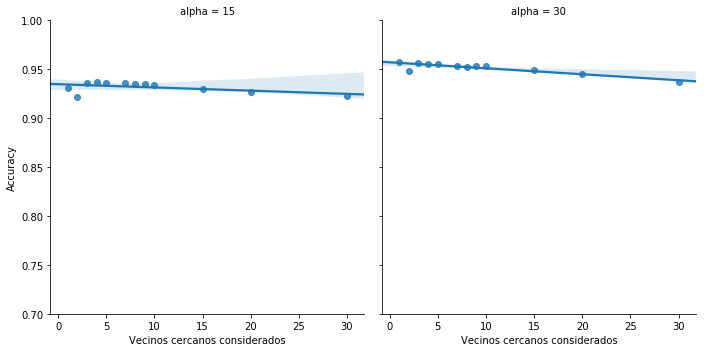

In [81]:
# Accuracy para Alpha 15
knn = [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30]
accuracy = [0.9305, 0.9214, 0.9363, 0.9372, 0.9360, 0.9357, 0.9346, 0.9349, 0.9344, 0.9297, 0.9263, 0.9226]
df15 = pd.DataFrame({"knn":knn, "accuracy":accuracy, "alpha":15})

# Accuracy para Alpha 30
knn = [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30]
accuracy = [0.9578, 0.9485, 0.9563, 0.9553, 0.9554, 0.9536, 0.9520, 0.9533, 0.9531, 0.9490, 0.9447, 0.9373]
df30 = pd.DataFrame({"knn":knn, "accuracy":accuracy, "alpha":30})


df = df15.append(df30)

plt.clf()
g = sns.lmplot(data=df, x="knn", y="accuracy", col="alpha")
g.set_axis_labels('Vecinos cercanos considerados','Accuracy')
plt.ylim(0.7, 1)
plt.show()


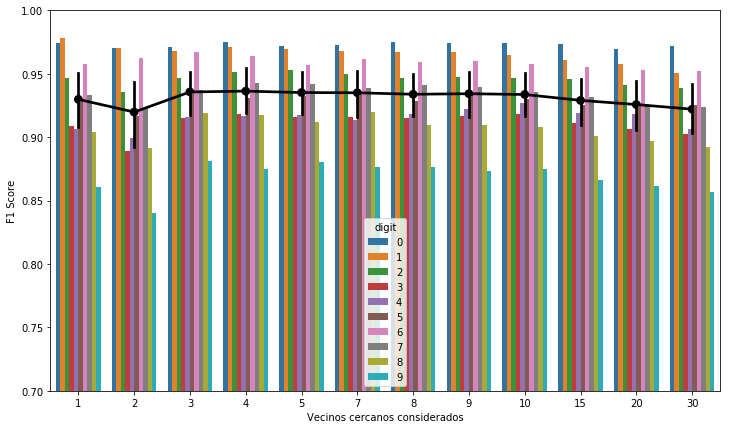

In [107]:
#F1 Score key digitos alpha 15

d0 = pd.DataFrame({
    'F1' : [0.9741, 0.9700, 0.9711, 0.9753, 0.9718, 0.9726, 0.9752, 0.9741, 0.9742, 0.9731, 0.9692, 0.9717],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [0]*12
})
d1 = pd.DataFrame({
    'F1' : [0.9778, 0.9702, 0.9676, 0.9707, 0.9698, 0.9680, 0.9672, 0.9672, 0.9645, 0.9605, 0.9577, 0.9509],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [1]*12
})
d2 = pd.DataFrame({
    'F1' : [0.9463, 0.9353, 0.9467, 0.9510, 0.9531, 0.9498, 0.9468, 0.9475, 0.9464, 0.9461, 0.9411, 0.9388],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [2]*12
})
d3 = pd.DataFrame({
    'F1' : [0.9091, 0.8891, 0.9149, 0.9181, 0.9161, 0.9160, 0.9154, 0.9166, 0.9184, 0.9108, 0.9067, 0.9027],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [3]*12
})
d4 = pd.DataFrame({
    'F1' : [0.9066, 0.8990, 0.9157, 0.9170, 0.9174, 0.9135, 0.9180, 0.9222, 0.9267, 0.9191, 0.9185, 0.9067],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [4]*12
})
d5 = pd.DataFrame({
    'F1' : [0.9290, 0.9166, 0.9353, 0.9311, 0.9321, 0.9329, 0.9286, 0.9323, 0.9298, 0.9256, 0.9263, 0.9252],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [5]*12
})
d6 = pd.DataFrame({
    'F1' : [0.9578, 0.9626, 0.9668, 0.9638, 0.9567, 0.9618, 0.9594, 0.9598, 0.9579, 0.9554, 0.9531, 0.9521],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [6]*12
})
d7 = pd.DataFrame({
    'F1' : [0.9330, 0.9232, 0.9375, 0.9430, 0.9419, 0.9391, 0.9413, 0.9393, 0.9355, 0.9320, 0.9257, 0.9234],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [7]*12
})
d8 = pd.DataFrame({
    'F1' : [0.9038, 0.8914, 0.9191, 0.9177, 0.9119, 0.9198, 0.9096, 0.9097, 0.9079, 0.9011, 0.8967, 0.8920],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [8]*12
})
d9 = pd.DataFrame({
    'F1' : [0.8603, 0.8401, 0.8814, 0.8749, 0.8806, 0.8761, 0.8764, 0.8735, 0.8748, 0.8659, 0.8618, 0.8567],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [9]*12
})


df15 = pd.concat([d0,d1,d2,d3,d4,d5,d6,d7,d8,d9], ignore_index=True)
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(ax=ax, x="knn", y="F1", hue="digit", data=df15)
sns.pointplot(ax=ax, x="knn", y="F1", color="black", data=df15)
ax.set_xlabel("Vecinos cercanos considerados")
ax.set_ylabel("F1 Score")
plt.ylim(0.7, 1)
plt.show()

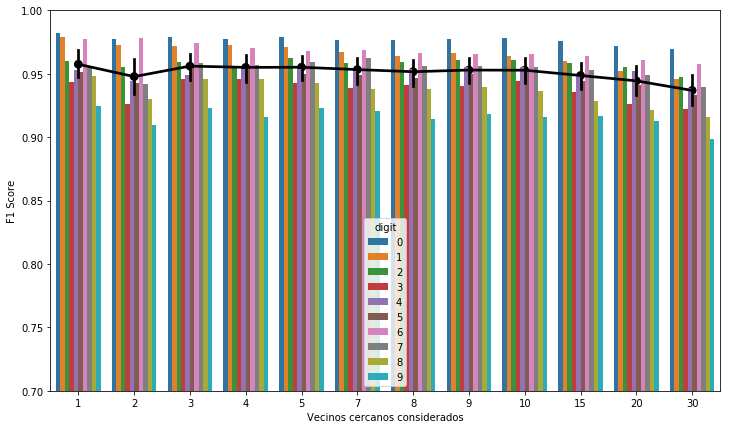

In [108]:
#F1 Score key digitos alpha 30

d0 = pd.DataFrame({
    'F1' : [0.9819, 0.9771, 0.9786, 0.9777, 0.9793, 0.9769, 0.9764, 0.9773, 0.9778, 0.9758, 0.9722, 0.9693],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [0]*12
})
d1 = pd.DataFrame({
    'F1' : [0.9789, 0.9723, 0.9718, 0.9726, 0.9707, 0.9669, 0.9639, 0.9660, 0.9638, 0.9603, 0.9524, 0.9458],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [1]*12
})
d2 = pd.DataFrame({
    'F1' : [0.9598, 0.9552, 0.9591, 0.9563, 0.9621, 0.9584, 0.9593, 0.9605, 0.9608, 0.9587, 0.9552, 0.9472],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [2]*12
})
d3 = pd.DataFrame({
    'F1' : [0.9436, 0.9258, 0.9459, 0.9457, 0.9429, 0.9385, 0.9407, 0.9404, 0.9443, 0.9356, 0.9259, 0.9219],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [3]*12
})
d4 = pd.DataFrame({
    'F1' : [0.9531, 0.9445, 0.9486, 0.9539, 0.9534, 0.9523, 0.9537, 0.9552, 0.9551, 0.9491, 0.9519, 0.9388],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [4]*12
})
d5 = pd.DataFrame({
    'F1' : [0.9517, 0.9430, 0.9541, 0.9556, 0.9495, 0.9493, 0.9465, 0.9494, 0.9524, 0.9439, 0.9414, 0.9332],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [5]*12
})
d6 = pd.DataFrame({
    'F1' : [0.9775, 0.9780, 0.9742, 0.9701, 0.9681, 0.9683, 0.9667, 0.9658, 0.9654, 0.9641, 0.9609, 0.9578],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [6]*12
})
d7 = pd.DataFrame({
    'F1' : [0.9553, 0.9417, 0.9586, 0.9566, 0.9595, 0.9626, 0.9562, 0.9562, 0.9552, 0.9527, 0.9491, 0.9398],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [7]*12
})
d8 = pd.DataFrame({
    'F1' : [0.9484, 0.9301, 0.9458, 0.9455, 0.9428, 0.9383, 0.9380, 0.9395, 0.9366, 0.9286, 0.9217, 0.9157],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [8]*12
})
d9 = pd.DataFrame({
    'F1' : [0.9242, 0.9095, 0.9231, 0.9158, 0.9227, 0.9209, 0.9142, 0.9184, 0.9160, 0.9169, 0.9128, 0.8988],
    'knn' : [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 30],
    'digit' : [9]*12
})


df30 = pd.concat([d0,d1,d2,d3,d4,d5,d6,d7,d8,d9], ignore_index=True)
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(ax=ax, x="knn", y="F1", hue="digit", data=df30)
sns.pointplot(ax=ax, x="knn", y="F1", color="black", data=df30)
ax.set_xlabel("Vecinos cercanos considerados")
ax.set_ylabel("F1 Score")
plt.ylim(0.7, 1)
plt.show()

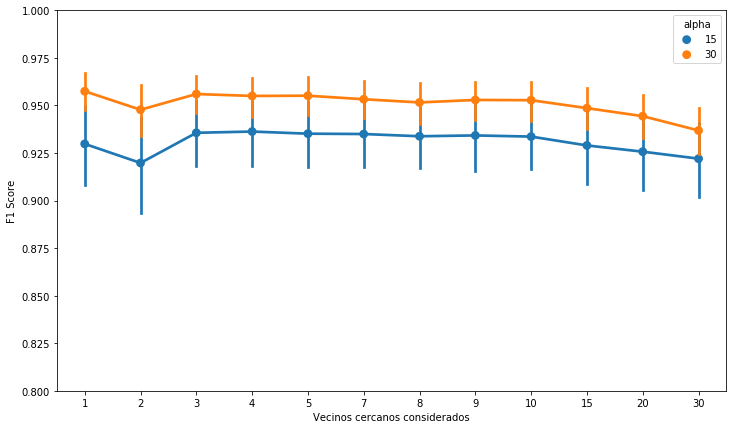

In [104]:
df15["alpha"] = 15
df30["alpha"] = 30
df = df15.append(df30)

fig, ax = plt.subplots(figsize=(12,7))
sns.pointplot(ax=ax, x="knn", y="F1", hue="alpha", data=df)
ax.set_xlabel("Vecinos cercanos considerados")
ax.set_ylabel("F1 Score")
plt.ylim(0.8, 1)
plt.show()